In [1]:
import numpy as np
import nnfs # package by the book's author to generate random data
from nnfs.datasets import vertical_data
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt
import math

nnfs.init()

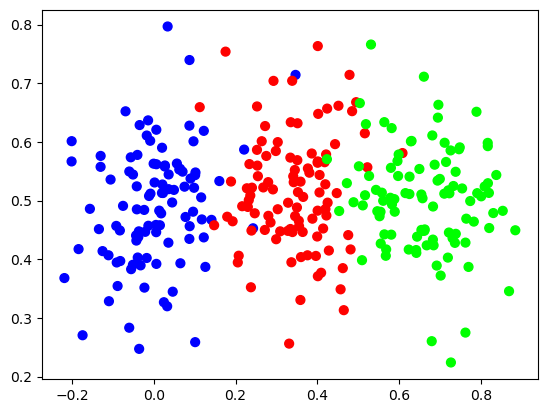

In [48]:
X, y = vertical_data(samples = 100, classes = 3)
plt.scatter(X[:, 0], X[:,1], c = y, s = 40, cmap = 'brg')
plt.show()

# Full network with optimization

In [49]:
# Dense layer

class Layer_Dense():
  
  # layer initialization
  def __init__(self, n_inputs, n_neurons):
      self.weights = 0.01 * np.random.rand(n_inputs, n_neurons)
      self.biases = np.zeros((1, n_neurons))
      
      
      
  # forward pass
  def forward(self, inputs):
    # calculate output values from inputs, weights and biases
    self.output = np.dot(inputs, self.weights) + self.biases
    
    
  
# ReLU activation

class Activation_Relu():
   
   # forward pass
   def forward(self, inputs):
     # calculate output values from inputs
     self.output = np.maximum(0,inputs)
    
    
    
# Softmax activation

class Activation_Softmax():
  
  # forward pass
  def forward(self, inputs):
    
    # get unnormalized probabilities
    exp_values = np.exp(inputs - np.max(inputs, axis = 1, keepdims = True))
    
    # normalize probabilities
    probabilities = exp_values / np.sum(exp_values, axis = 1, keepdims = True)
    
    self.output = probabilities
    
    

# Common loss class

class Loss():
  
  # calculates the data and regularization losses
  # given model output and ground truth values
  
  def calculate(self, output, y):
    # calculate sample loss
    sample_losses = self.forward(output, y)
    
    # calculate mean loss
    data_loss = np.mean(sample_losses)
    
    # return loss
    return data_loss
  

  
  
# Cross-entropy loss

class Loss_CategoricalCrossentropy(Loss):
  
  # forward pass
  def forward(self, y_pred, y_true):
    
    # number of samples in a batch
    samples = len(y_pred)
    
    # clip data to prevent division by 0
    # clip both sides to not drag the mean towards any value
    y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
    
    
    # probabilites for target values
    # only if categorical labels
    
    if len(y_true.shape) == 1:
      correct_confidences = y_pred_clipped[range(samples), y_true]
      
    # mask values - only for one hot encoded labels
    elif len(y_true.shape) == 2:
      correct_confidences = np.sum(y_pred_clipped * y_true, axis = 1)
    
    
    # Losses
    negative_log_likelihoods = -np.log(correct_confidences)
    return negative_log_likelihoods

In [50]:
# create dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# create ReLU activation which will be used with Dense layer
activation1 = Activation_Relu()

# create second dense layer with 3 input features from the previous layer and 3 output values
dense2 = Layer_Dense(3,3)

# create softmax activation which will be used with dense layer
activation2 = Activation_Softmax()

# create a loss function
loss_function = Loss_CategoricalCrossentropy()

In [51]:
# create variables to track the best loss
lowest_loss = 9999999
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

In [31]:
# iterating as many times as desired, with new random weights which we will update if they are lower than the original ones

for iteration in range(30000):
  # generate new set of weights
  dense1.weights = 0.05 * np.random.rand(2, 3)
  dense2.weights = 0.05 * np.random.rand(3, 3)
  dense1.biases = 0.05 * np.random.rand(1, 3)
  dense2.biases = 0.05 * np.random.rand(1, 3)
  
  # perform a forward pass
  dense1.forward(X)
  activation1.forward(dense1.output)
  dense2.forward(activation1.output)
  activation2.forward(dense2.output)
  
  # perform a forward pass through activation function
  loss = loss_function.calculate(activation2.output, y)
  
  # calculate accuracy
  predictions = np.argmax(activation2.output, axis = 1)
  accuracy = np.mean(predictions == y)
  
  # if loss is smaller - print i and save new weights and biases
  if loss < lowest_loss:
    print(f'Better parameters found at iteration: {iteration}\nLoss: {loss}     Accuracy: {accuracy}')
    best_dense1_weights = dense1.weights.copy()
    best_dense1_biases = dense1.biases.copy()
    best_dense2_weights = dense2.weights.copy()
    best_dense2_biases = dense2.biases.copy()
    lowest_loss = loss

Better parameters found at iteration: 0
Loss: 1.0985941959623176     Accuracy: 0.3333333333333333
Better parameters found at iteration: 3
Loss: 1.0985155749463977     Accuracy: 0.3333333333333333
Better parameters found at iteration: 16
Loss: 1.0984169728066508     Accuracy: 0.3333333333333333
Better parameters found at iteration: 68
Loss: 1.0983665493242805     Accuracy: 0.3333333333333333
Better parameters found at iteration: 117
Loss: 1.098332937030553     Accuracy: 0.3333333333333333
Better parameters found at iteration: 195
Loss: 1.098223877132303     Accuracy: 0.3333333333333333
Better parameters found at iteration: 2659
Loss: 1.0981866961069493     Accuracy: 0.35
Better parameters found at iteration: 3938
Loss: 1.0981638629404429     Accuracy: 0.3333333333333333
Better parameters found at iteration: 5637
Loss: 1.0981334631771664     Accuracy: 0.3333333333333333


In [32]:
# above makes it clear than assigning weights and biases randomly does not optimize our network

In [33]:
# instead of selecting weights and biases randomly we will adjust them
dense1.weights += 0.05 * np.random.rand(2, 3)
dense2.weights += 0.05 * np.random.rand(3, 3)
dense1.biases  += 0.05 * np.random.rand(1, 3)
dense2.biases  += 0.05 * np.random.rand(1, 3)

In [35]:
# and change the if statement

if loss < lowest_loss:
    print(f'Better parameters found at iteration: {iteration}\nLoss: {loss}     Accuracy: {accuracy}')
    best_dense1_weights = dense1.weights.copy()
    best_dense1_biases = dense1.biases.copy()
    best_dense2_weights = dense2.weights.copy()
    best_dense2_biases = dense2.biases.copy()
    lowest_loss = loss
    
else:
    dense1_weights = best_dense1_weights.copy()
    dense1_biases = best_dense1_biases.copy()
    dense2_weights = best_dense2_weights.copy()
    dense2_biases = best_dense2_biases.copy()

In [74]:
# create dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# create ReLU activation which will be used with Dense layer
activation1 = Activation_Relu()

# create second dense layer with 3 input features from the previous layer and 3 output values
dense2 = Layer_Dense(3,3)

# create softmax activation which will be used with dense layer
activation2 = Activation_Softmax()

# create a loss function
loss_function = Loss_CategoricalCrossentropy()

In [76]:
# iterating as many times as desired, with updating weights instead of random ones

# create variables to track the best loss
lowest_loss = 9999999
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(30000):
  # adjust the weights
  dense1.weights += 0.05 * np.random.rand(2, 3)
  dense2.weights += 0.05 * np.random.rand(3, 3)
  dense1.biases  += 0.05 * np.random.rand(1, 3)
  dense2.biases  += 0.05 * np.random.rand(1, 3)
  
  # perform a forward pass
  dense1.forward(X)
  activation1.forward(dense1.output)
  dense2.forward(activation1.output)
  activation2.forward(dense2.output)
  
  # perform a forward pass through activation function
  loss = loss_function.calculate(activation2.output, y)
  
  # calculate accuracy
  predictions = np.argmax(activation2.output, axis = 1)
  accuracy = np.mean(predictions == y)
  
  # if loss is smaller - print i and save new weights and biases
  if loss < lowest_loss:
        print(f'Better parameters found at iteration: {iteration}\nLoss: {loss}     Accuracy: {accuracy}')
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
  else:
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()
      

Better parameters found at iteration: 0
Loss: 0.1854703277349472     Accuracy: 0.92
Better parameters found at iteration: 1
Loss: 0.17151248455047607     Accuracy: 0.9333333333333333
Better parameters found at iteration: 2
Loss: 0.16772636771202087     Accuracy: 0.9333333333333333
Better parameters found at iteration: 4
Loss: 0.16662928462028503     Accuracy: 0.94
Better parameters found at iteration: 6
Loss: 0.16329187154769897     Accuracy: 0.9466666666666667
Better parameters found at iteration: 412
Loss: 0.16312387585639954     Accuracy: 0.9433333333333334
Better parameters found at iteration: 588
Loss: 0.1631007194519043     Accuracy: 0.9366666666666666
Better parameters found at iteration: 844
Loss: 0.16284385323524475     Accuracy: 0.9366666666666666
Better parameters found at iteration: 860
Loss: 0.16277015209197998     Accuracy: 0.9433333333333334
Better parameters found at iteration: 1042
Loss: 0.16235318779945374     Accuracy: 0.9433333333333334
Better parameters found at it